In [1]:
import cv2
import numpy as np
from feature_process import *
import matplotlib.pyplot as plt

In [6]:
csv = r'C:\Users\x\Desktop\vid_top\csv\Cap-C973-basal.csv'
vid = r'C:\Users\x\Desktop\vid_top\video_seg\Cap-C973-basal.avi'
sel = 50
dlc0 = dlc(csv)
coord = dlc0.raw_wrap[sel-1]
cap = cv2.VideoCapture(vid)
for i in range(sel):
    ret,frame = cap.read()
cap.release()

In [7]:
def align_image(img, fixpt, rotatept, midx=200, midy=200, rotateTo=0):
    dx = midx-fixpt[0]
    dy = midy-fixpt[1]
    H = np.float32([[1,0,dx],[0,1,dy]])
    move = cv2.warpAffine(img,H, (img.shape[1],img.shape[0]))
    d_angle = (rotateTo-np.arctan2(rotatept[0],rotatept[1]))*180/np.pi
    H = cv2.getRotationMatrix2D((midx,midy),d_angle,1)
    move = cv2.warpAffine(move,H, (frame.shape[1],frame.shape[0]))
    return move

def align_point(coord, fixpt, rotatept, midx=200, midy=200, rotateTo=0):
    newcoord = coord.copy()
    dx = midx-fixpt[0]
    dy = midy-fixpt[1]
    newcoord[:,0] = newcoord[:,0]+dx
    newcoord[:,1] = newcoord[:,1]+dy
    d_angle = (rotateTo-np.arctan2(rotatept[0],rotatept[1]))*180/np.pi
    H = cv2.getRotationMatrix2D((midx,midy),d_angle,1)
    A = H[:,0:2]
    B = H[:,2]
    newcoord = np.matmul(newcoord,A.T)
    newcoord[:,0] = newcoord[:,0]+B[0]
    newcoord[:,1] = newcoord[:,1]+B[1]
    newcoord = np.int32(newcoord)
    return newcoord

def align_all(raw_wrap, wrap=False, midx=200, midy=200, rotateTo=0, fixpt_index=3, rotatept_index=6):
    newraw = raw_wrap.copy()
    for i in range(len(newraw)):
        newraw[i] = align_point(newraw[i], newraw[i,fixpt_index], newraw[i,rotatept_index], midx=200, midy=200, rotateTo=0)
    if not wrap:
        newraw = np.resize(newraw,(len(newraw),newraw.shape[1]*newraw.shape[2]))
    return newraw

In [8]:
newraw = align_all(dlc0.raw_wrap,True)

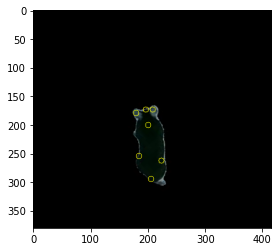

In [9]:
move = align_image(frame, coord[3], coord[6], midx=200, midy=200, rotateTo=0)
newcoord = newraw[sel-1]
for x,y in newcoord:
    cv2.circle(move,(x,y), 5, (255, 255, 0), 0)
plt.imshow(move)